<a href="https://colab.research.google.com/github/lucasaltm/datascience/blob/main/Amazon_Rainforest_Degradation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://image.cnbcfm.com/api/v1/image/106975234-1636936362963-gettyimages-1228062683-AFP_1WJ4KX.jpeg?v=1636936106)


</br>

---

</br>

# Análise sobre desmatamentos e incêndios florestais no Brasil

A análise a seguir foi desenvolvida durante a disciplina de Fundamentos de Análise de Dados ministrada pelo professor Evandro Franzen na Universidade de Santa Cruz do Sul (UNISC) no segundo semestre de 2020.

Foram utilizados dois datasets disponibilizados no Kaggle:
- [Amazon.csv](https://www.kaggle.com/datasets/gustavomodelli/forest-fires-in-brazil): O dataset possui os números de incêndios florestais reportados no Brasil por estado de 1998 até o final de 2016.
- [Def_area_2004_2019.csv](https://www.kaggle.com/datasets/mbogernetto/brazilian-amazon-rainforest-degradation): O dataset possui áreas desmatadas em km² nos estados que compõem a Amazônia Legal (Acre, Amapá, Amazonas, Mato Grosso, Pará, Rondônia, Roraima e Tocantins e Maranhão) de 1999 a 2019.

</br>

---

</br>

### Proposta inicial:
Ao início do trabalho, as intenções eram comparar os dois datasets para conferir se ambos possúem correlações, analisar os dados para verificar quais estados com maiores degradações e aplicar séries temporais ao dataset Amazon.csv que possui dados mensais.

</br>

---

</br>

### Instalação e importação das bibliotecas necessárias:


In [ ]:
!pip install pmdarima
import scipy.stats as st
import pandas as pd
import numpy as np
from scipy.stats import norm, skewnorm
import matplotlib.pyplot as plt
import statistics as stat
import seaborn as sb
from sklearn.preprocessing import LabelEncoder,  StandardScaler
from pandas.plotting import register_matplotlib_converters
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from scipy.stats.stats import pearsonr
from sklearn.linear_model import LinearRegression


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


</br>

---

</br>

### Leitura e visualização dos dados:

In [ ]:
defarea = pd.read_csv('def_area_2004_2019.csv', sep=',')
defarea.columns = ["Ano","Acre","Amazonas","Amapa","Maranhao","Mato Grosso","Pará","Rondonia","Roraima","Tocantins","Total"]
 
amazon = pd.read_csv('amazon.csv', sep=',', engine='python', thousands='.', encoding = "ISO-8859-1")

amazon


,year,state,month,number,date
0,1998,Acre,Janeiro,0,1998-01-01
1,1999,Acre,Janeiro,0,1999-01-01
2,2000,Acre,Janeiro,0,2000-01-01
3,2001,Acre,Janeiro,0,2001-01-01
4,2002,Acre,Janeiro,0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128,2012-01-01
6450,2013,Tocantins,Dezembro,85,2013-01-01
6451,2014,Tocantins,Dezembro,223,2014-01-01
6452,2015,Tocantins,Dezembro,373,2015-01-01


In [ ]:
defarea

,Ano,Acre,Amazonas,Amapa,Maranhao,Mato Grosso,Pará,Rondonia,Roraima,Tocantins,Total
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772
1,2005,592,775,33,922,7145,5899,3244,133,271,19014
2,2006,398,788,30,674,4333,5659,2049,231,124,14286
3,2007,184,610,39,631,2678,5526,1611,309,63,11651
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911
5,2009,167,405,70,828,1049,4281,482,121,61,7464
6,2010,259,595,53,712,871,3770,435,256,49,7000
7,2011,280,502,66,396,1120,3008,865,141,40,6418
8,2012,305,523,27,269,757,1741,773,124,52,4571
9,2013,221,583,23,403,1139,2346,932,170,74,5891


</br>

---

</br>

### Análise dos dados:

- Incêndios registrados por estado de 1998 a 2017


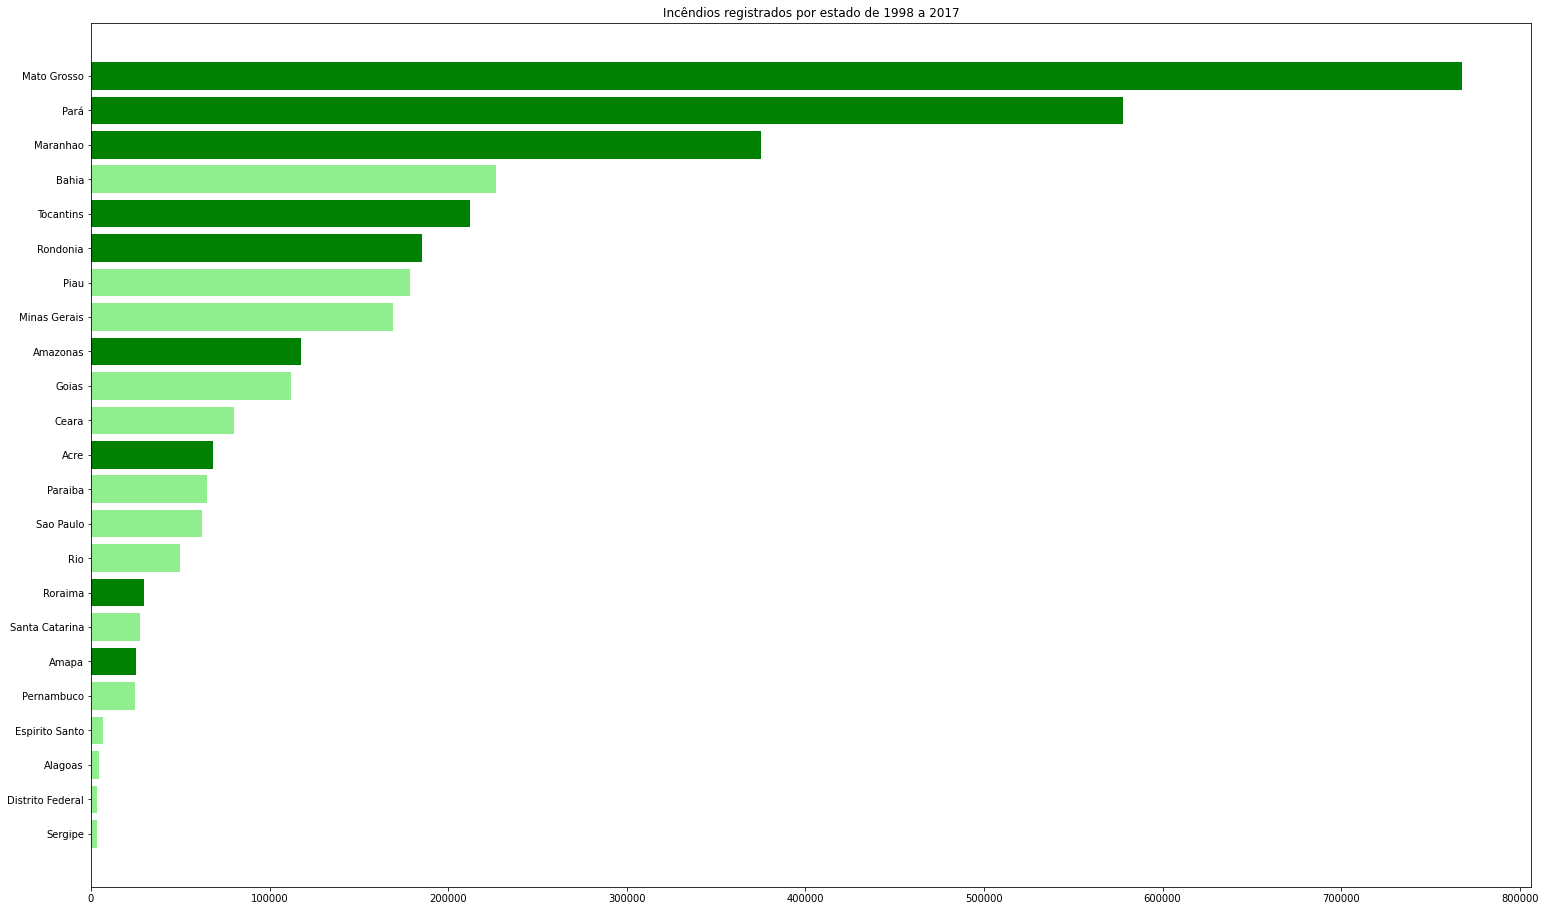

In [ ]:
#A atual área de abrangência da Amazônia Legal corresponde à totalidade dos estados do Acre, Amapá, Amazonas, Mato Grosso, Pará, Rondônia, Roraima e Tocantins e Maranhão

incendios_estados = pd.DataFrame(amazon.groupby(['state'])['number'].sum())
incendios_estados = incendios_estados.sort_values('number')
fig = plt.figure(figsize=[20,12])
ax = fig.add_axes([0,0,1,1])
ax.set(title='Incêndios registrados por estado de 1998 a 2017')
cores = ['lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'green', 'lightgreen', 'green', 'lightgreen', 'lightgreen', 'lightgreen', 'green', 'lightgreen', 'lightgreen',
                                                                   'green','lightgreen','lightgreen','green','green','lightgreen','green','green','green']
ax.barh(incendios_estados.index,incendios_estados['number'],color=cores);

Nesse gráfico os estados foram separados por cores. Os estados que compõe a Amazônia legal estão com a cor verde escura, enquanto os demais estados estão com a com verde claro. Nele já podemos notar que a maior parte dos incêndios se localizam na Amazônia Legal. Dos 6 estados com maiores números de incêndios, 5 compõe a Amazônia legal.

</br>


---


</br>


- Comparação entre incêndios e desmatamentos nos estados que compõem a Amazônia Legal

<ipython-input-5-430cff6accc7>:11: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  pz1.pie(incendios_estados_amazonia, autopct='%1.lf%%',labels=labels,explode=explode)


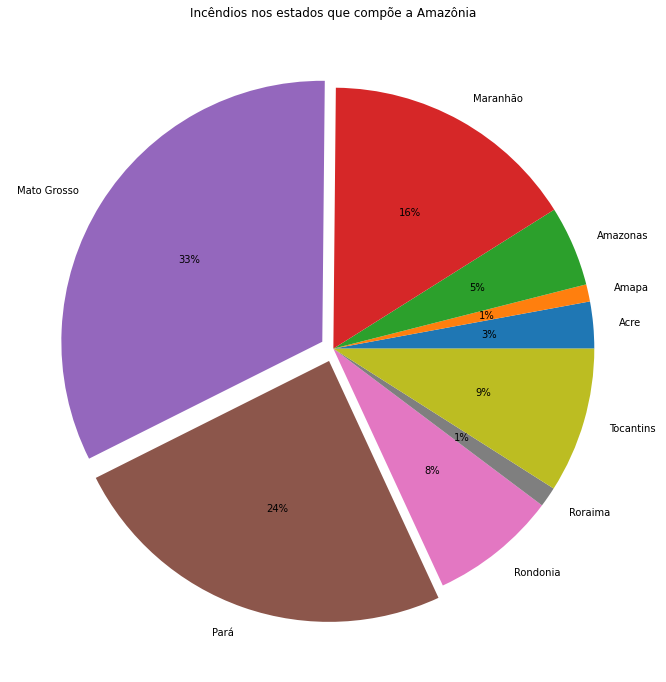

In [ ]:
incendios_amazonia = amazon[(amazon['state']=='Acre') | (amazon['state']=='Amapa') | (amazon['state']=='Amazonas') | (amazon['state']=='Mato Grosso') | (amazon['state']=='Pará') |
               (amazon['state']=='Rondonia') | (amazon['state']=='Roraima') | (amazon['state']=='Tocantins') | (amazon['state']=='Maranhao')]
incendios_estados_amazonia = pd.DataFrame(incendios_amazonia.groupby(['state'])['number'].sum())
incendios_estados_amazonia

fig, (pz1) = plt.subplots(1, 1)
fig.set_size_inches(25,12)
labels = 'Acre', 'Amapa', 'Amazonas', 'Maranhão', 'Mato Grosso','Pará','Rondonia','Roraima','Tocantins'
explode = (0, 0, 0, 0,0.05,0.05,0,0,0)
pz1.set(title='Incêndios nos estados que compõe a Amazônia')
pz1.pie(incendios_estados_amazonia, autopct='%1.lf%%',labels=labels,explode=explode)
fig.show()

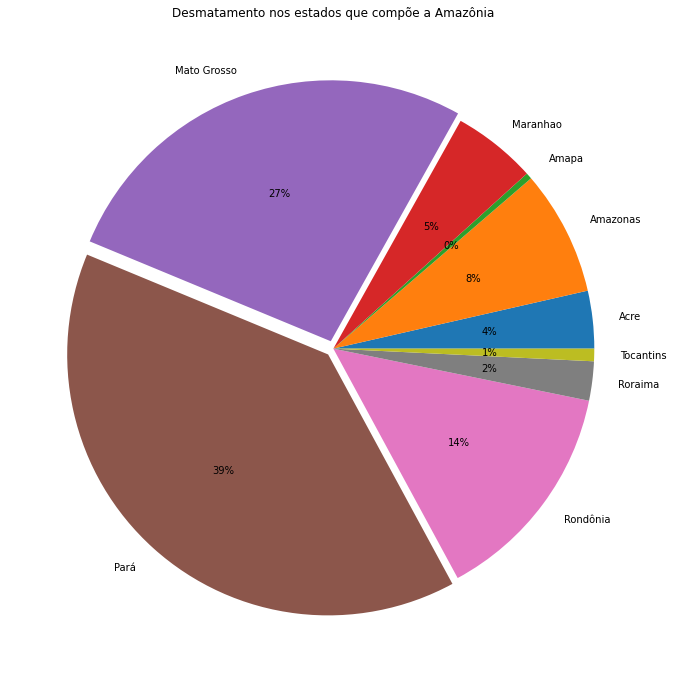

In [ ]:
defarea2 = defarea.copy()
defarea2 = defarea2.drop(columns=['Ano', 'Total']).sum()

defarea2

fig, (pz1) = plt.subplots(1, 1)
fig.set_size_inches(25,12)
labels = 'Acre', 'Amazonas', 'Amapa', 'Maranhao', 'Mato Grosso','Pará','Rondônia','Roraima','Tocantins'
explode = (0, 0, 0, 0,0.03,0.03,0,0,0)

pz1.set(title='Desmatamento nos estados que compõe a Amazônia')
pz1.pie(defarea2, autopct='%1.lf%%',labels=labels,explode=explode)
fig.show()

Com estes gráficos, conseguimos ver uma possível correlação entre os incêndios e áreas
desmatadas nos estados, ou seja, quanto maior o número de incêndios, maior o número de
desmatamentos.

</br>


---


</br>


- Soma de incêndios florestais por mês em cada estado registrado no dataset
Amazon.csv

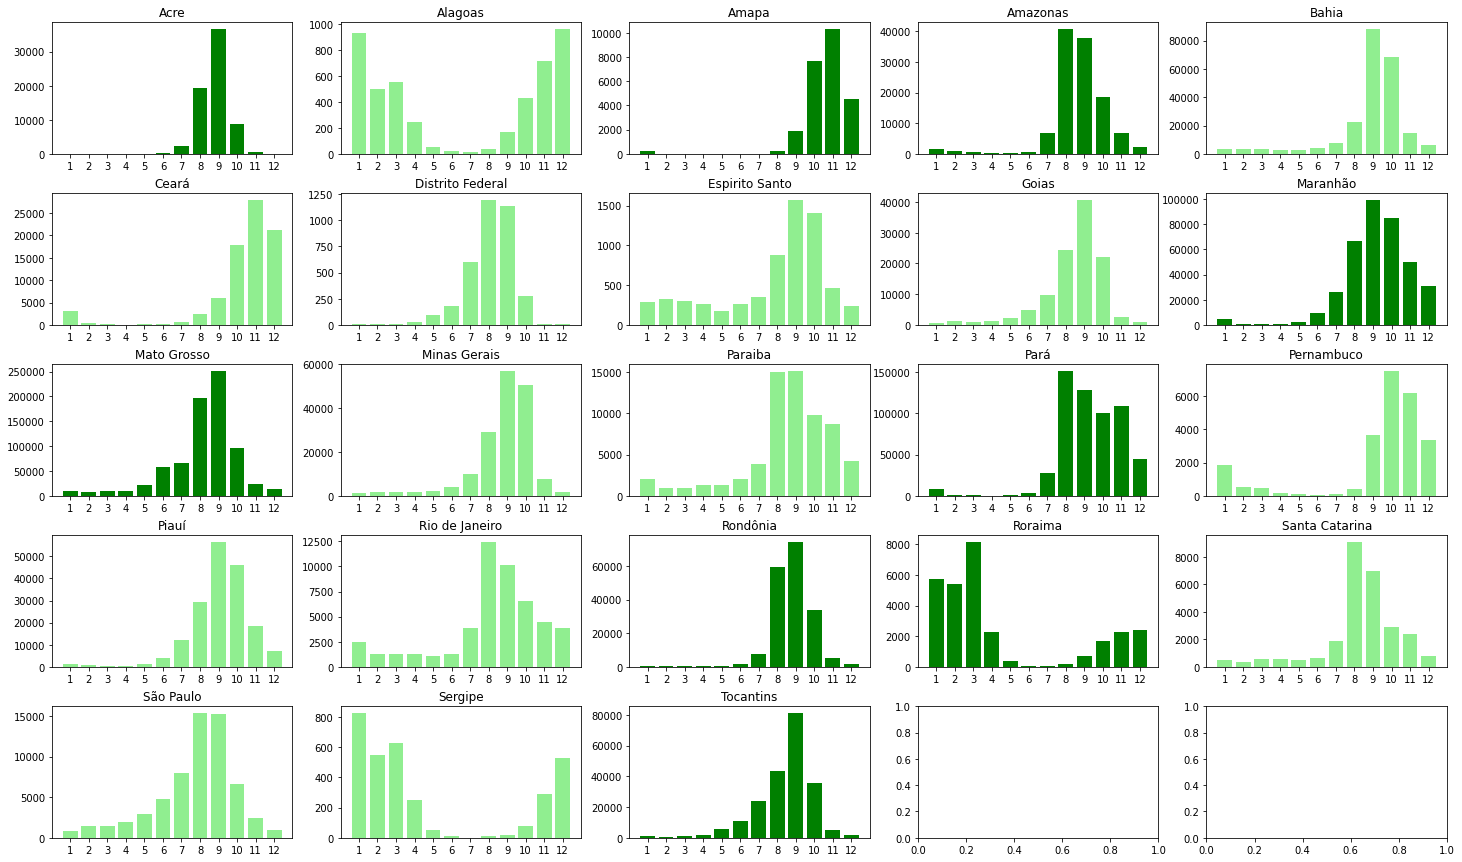

In [ ]:
index = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio' ,'Junho', 'Julho','Agosto','Setembro','Outubro','Novembro','Dezembro']

acre = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Acre')]).groupby(['month'])['number'].sum()).reindex(index)
alagoas = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Alagoas')]).groupby(['month'])['number'].sum()).reindex(index)
amapa = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Amapa')]).groupby(['month'])['number'].sum()).reindex(index)
amazonas = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Amazonas')]).groupby(['month'])['number'].sum()).reindex(index)
bahia = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Bahia')]).groupby(['month'])['number'].sum()).reindex(index)
ceara = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Ceara')]).groupby(['month'])['number'].sum()).reindex(index)
distritof = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Distrito Federal')]).groupby(['month'])['number'].sum()).reindex(index)
espsanto = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Espirito Santo')]).groupby(['month'])['number'].sum()).reindex(index)
goias = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Goias')]).groupby(['month'])['number'].sum()).reindex(index)
maranhao = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Maranhao')]).groupby(['month'])['number'].sum()).reindex(index)
matogrosso = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Mato Grosso')]).groupby(['month'])['number'].sum()).reindex(index)
minasgerais = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Minas Gerais')]).groupby(['month'])['number'].sum()).reindex(index)
paraiba = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Paraiba')]).groupby(['month'])['number'].sum()).reindex(index)
para = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Pará')]).groupby(['month'])['number'].sum()).reindex(index)
pernambuco = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Pernambuco')]).groupby(['month'])['number'].sum()).reindex(index)
piaui = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Piau')]).groupby(['month'])['number'].sum()).reindex(index)
rio = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Rio')]).groupby(['month'])['number'].sum()).reindex(index)
rondonia = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Rondonia')]).groupby(['month'])['number'].sum()).reindex(index)
roraima = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Roraima')]).groupby(['month'])['number'].sum()).reindex(index)
santacatarina = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Santa Catarina')]).groupby(['month'])['number'].sum()).reindex(index)
saopaulo = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Sao Paulo')]).groupby(['month'])['number'].sum()).reindex(index)
sergipe = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Sergipe')]).groupby(['month'])['number'].sum()).reindex(index)
tocantins = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Tocantins')]).groupby(['month'])['number'].sum()).reindex(index)


fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 5,sharey=False, sharex=False,squeeze=True)#sharey=True
plt.subplots_adjust(wspace=0.2, hspace=0.3)#plt.subplots_adjust(wspace=0, hspace=0.3)
labelmeses = ['1', '2', '3', '4', '5' ,'6', '7','8','9','10','11','12']



fig.set_size_inches(25,15)
fig.canvas.draw()

ax1[0].bar(acre.index,acre['number'],color='green')
ax1[0].set_xticklabels(labelmeses)
ax1[0].set(title='Acre')

ax1[1].bar(alagoas.index,alagoas['number'],color='lightgreen')
ax1[1].set_xticklabels(labelmeses)
ax1[1].set(title='Alagoas')

ax1[2].bar(amapa.index,amapa['number'],color='green')
ax1[2].set_xticklabels(labelmeses)
ax1[2].set(title='Amapa')

ax1[3].bar(amazonas.index,amazonas['number'],color='green')
ax1[3].set_xticklabels(labelmeses)
ax1[3].set(title='Amazonas')

ax1[4].bar(bahia.index,bahia['number'],color='lightgreen')
ax1[4].set_xticklabels(labelmeses)
ax1[4].set(title='Bahia')

ax2[0].bar(ceara.index,ceara['number'],color='lightgreen')
ax2[0].set_xticklabels(labelmeses)
ax2[0].set(title='Ceará')

ax2[1].bar(distritof.index,distritof['number'],color='lightgreen')
ax2[1].set_xticklabels(labelmeses)
ax2[1].set(title='Distrito Federal')

ax2[2].bar(espsanto.index,espsanto['number'],color='lightgreen')
ax2[2].set_xticklabels(labelmeses)
ax2[2].set(title='Espirito Santo')

ax2[3].bar(goias.index,goias['number'],color='lightgreen')
ax2[3].set_xticklabels(labelmeses)
ax2[3].set(title='Goias')

ax2[4].bar(maranhao.index,maranhao['number'],color='green')
ax2[4].set_xticklabels(labelmeses)
ax2[4].set(title='Maranhão')

ax3[0].bar(matogrosso.index,matogrosso['number'],color='green')
ax3[0].set_xticklabels(labelmeses)
ax3[0].set(title='Mato Grosso')

ax3[1].bar(minasgerais.index,minasgerais['number'],color='lightgreen')
ax3[1].set_xticklabels(labelmeses)
ax3[1].set(title='Minas Gerais')

ax3[2].bar(paraiba.index,paraiba['number'],color='lightgreen')
ax3[2].set_xticklabels(labelmeses)
ax3[2].set(title='Paraiba')

ax3[3].bar(para.index,para['number'],color='green')
ax3[3].set_xticklabels(labelmeses)
ax3[3].set(title='Pará')

ax3[4].bar(pernambuco.index,pernambuco['number'],color='lightgreen')
ax3[4].set_xticklabels(labelmeses)
ax3[4].set(title='Pernambuco')

ax4[0].bar(piaui.index,piaui['number'],color='lightgreen')
ax4[0].set_xticklabels(labelmeses)
ax4[0].set(title='Piauí')

ax4[1].bar(rio.index,rio['number'],color='lightgreen')
ax4[1].set_xticklabels(labelmeses)
ax4[1].set(title='Rio de Janeiro')

ax4[2].bar(rondonia.index,rondonia['number'],color='green')
ax4[2].set_xticklabels(labelmeses)
ax4[2].set(title='Rondônia')

ax4[3].bar(roraima.index,roraima['number'],color='green')
ax4[3].set_xticklabels(labelmeses)
ax4[3].set(title='Roraima')

ax4[4].bar(santacatarina.index,santacatarina['number'],color='lightgreen')
ax4[4].set_xticklabels(labelmeses)
ax4[4].set(title='Santa Catarina')

ax5[0].bar(saopaulo.index,saopaulo['number'],color='lightgreen')
ax5[0].set_xticklabels(labelmeses)
ax5[0].set(title='São Paulo')

ax5[1].bar(sergipe.index,sergipe['number'],color='lightgreen')
ax5[1].set_xticklabels(labelmeses)
ax5[1].set(title='Sergipe')

ax5[2].bar(tocantins.index,tocantins['number'],color='green')
ax5[2].set_xticklabels(labelmeses)
ax5[2].set(title='Tocantins')

plt.show()


Nesses gráficos, o mesmo padrão de cores foi utilizado: verde escuro para estados que compõem a Amazônia Legal e verde claro para os outros. Aqui já podemos notar uma possível sazonalidade, na maioria dos estados, acontece um pico de incêndios florestais a partir do segundo semestre do ano.

</br>


---


</br>

- Soma de todos incêndios florestais por mês

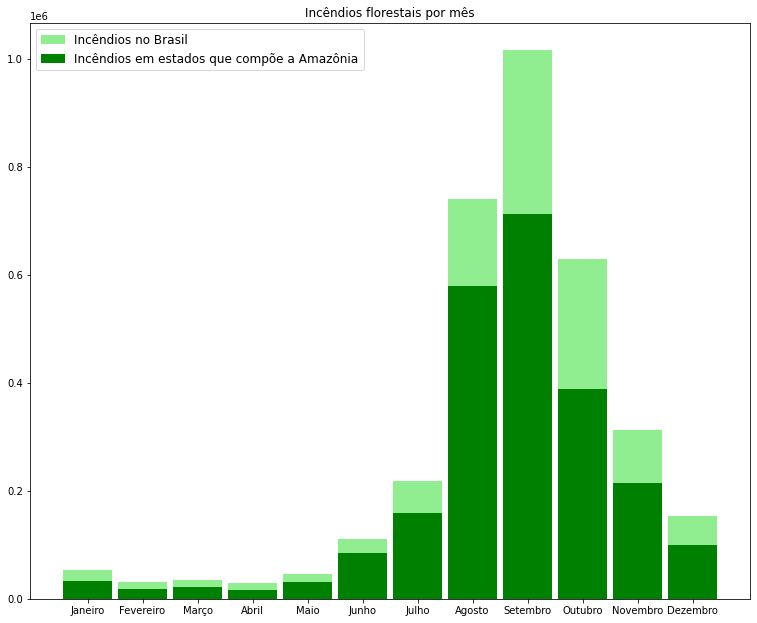

In [ ]:
incendios_mes = pd.DataFrame(amazon.groupby(['month'])['number'].sum())

incendios_mes = incendios_mes.reindex(index)
incendios_mes

incendios_mes_amazonia = pd.DataFrame(incendios_amazonia.groupby(['month'])['number'].sum())
incendios_mes_amazonia
incendios_mes_amazonia.reindex(index)

fig = plt.figure(figsize=[10,8])
ax = fig.add_axes([0,0,1,1])
ax.set(title='Incêndios florestais por mês')

ax.set_xticklabels(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio' ,'Junho', 'Julho','Agosto','Setembro','Outubro','Novembro','Dezembro'])
ax.bar(incendios_mes.index,incendios_mes['number'],width=0.9,color='lightgreen', label='Incêndios no Brasil')
ax.bar(incendios_mes_amazonia.index,incendios_mes_amazonia['number'],width=0.9,color='green', label='Incêndios em estados que compõe a Amazônia')
ax.legend(prop={'size': 12})
plt.show()

Aqui podemos notar claramente a sazonalidade no segundo semestre.

</br>


---


</br>

- Incêndios Florestais e desmatamentos ao longo dos anos e aplicação do teste de Pearson e regressão linear nos dados

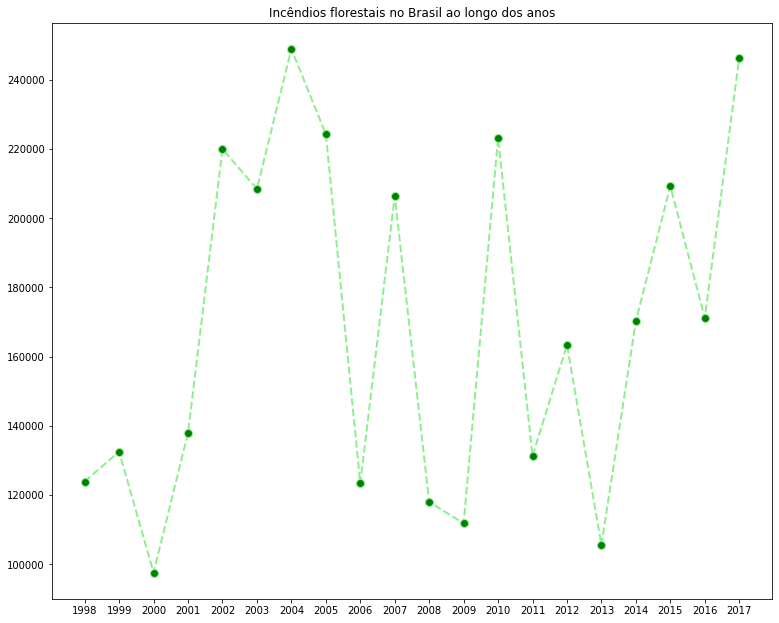

In [ ]:
incendios_ano = pd.DataFrame(amazon.groupby(['year'])['number'].sum())

fig = plt.figure(figsize=[10,8])
ax = fig.add_axes([0,0,1,1])
ax.set(title='Incêndios florestais no Brasil ao longo dos anos')

ax.set_xticks(np.arange(min(defarea.index), max(incendios_ano.index)+1, 1.0))

ax.plot(incendios_ano.index,incendios_ano['number'],color='lightgreen',marker='o',linestyle='dashed',linewidth=2, markersize=8, markerfacecolor='green')

Teste de Pearson(Correlação):  0.2168903116020578





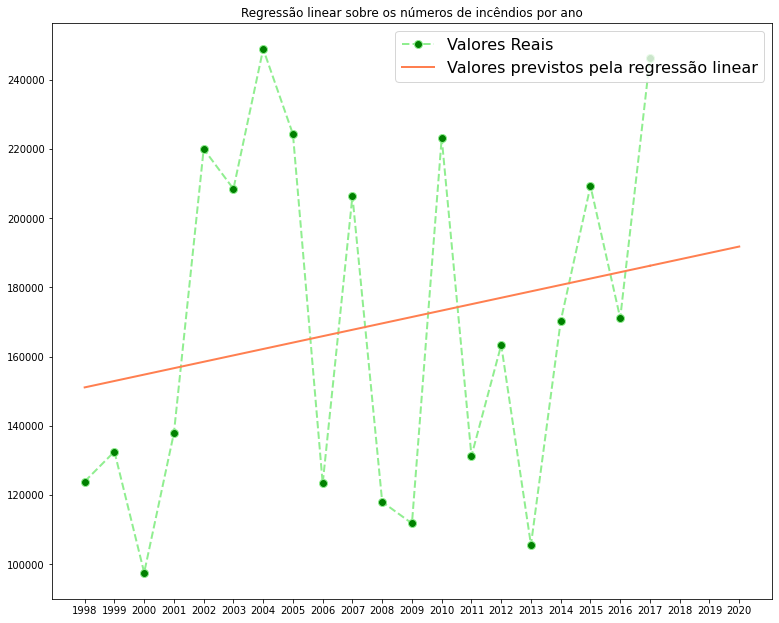

In [ ]:
correlacao = pearsonr(incendios_ano.index,incendios_ano['number'])
print('Teste de Pearson(Correlação): ', correlacao[0])
print('\n\n')

preditor_lr = LinearRegression()
X = incendios_ano.index.values
X = X.reshape(-1,1)
y = incendios_ano["number"]
#print(X)
#print(y)

#fit
preditor_lr.fit(X,y)
#print(preditor_lr.coef_)
#print(preditor_lr.intercept_)

#predict
X_e = np.array([2017,2018,2019,2020])
y_pred = preditor_lr.predict(X_e.reshape(-1,1))
#print(y_pred)

y_predicted = preditor_lr.predict(X)

fig = plt.figure(figsize=[10,8])
ax = fig.add_axes([0,0,1,1])

ax.set(title='Regressão linear sobre os números de incêndios por ano')
ax.set_xticks(np.arange(min(incendios_ano.index), max(X_e)+1, 1.0))

#ax.scatter(incendios_ano.index,incendios_ano['number'],color='green')
ax.plot(incendios_ano.index,incendios_ano['number'],color='lightgreen',marker='o',linestyle='dashed',linewidth=2, markersize=8, markerfacecolor='green', label='Valores Reais')


ax.plot(X_e,y_pred,color='coral',linewidth=2)
ax.plot(X,y_predicted,color='coral',linewidth=2,label='Valores previstos pela regressão linear')
ax.legend(prop={'size': 16})

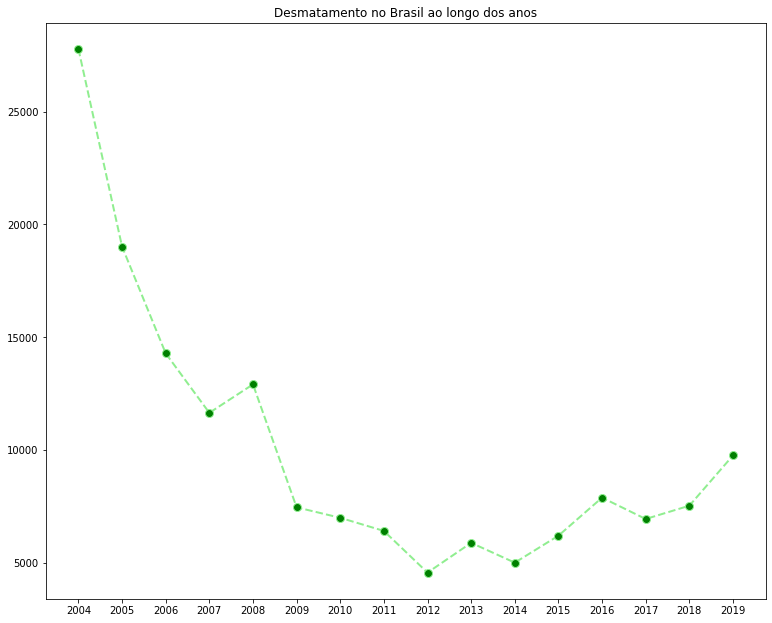

In [ ]:
fig = plt.figure(figsize=[10,8])
ax = fig.add_axes([0,0,1,1])
ax.set(title='Desmatamento no Brasil ao longo dos anos')

ax.set_xticks(np.arange(min(defarea['Ano']), max(defarea['Ano']+1), 1.0))

ax.plot(defarea['Ano'],defarea['Total'],color='lightgreen',marker='o',linestyle='dashed',linewidth=2, markersize=8, markerfacecolor='green')

Teste de Pearson(Correlação):  -0.6852841491707095





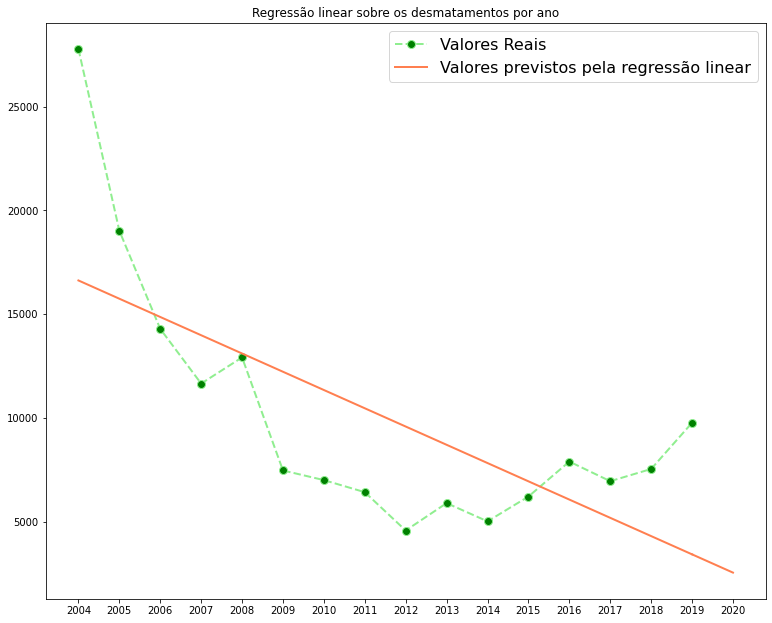

In [ ]:
correlacao = pearsonr(defarea['Ano'],defarea['Total'])
print('Teste de Pearson(Correlação): ', correlacao[0])
print('\n\n')

preditor_lr = LinearRegression()
X = defarea['Ano'].values
X = X.reshape(-1,1)
y = defarea['Total']
#print(X)
#print(y)

#fit
preditor_lr.fit(X,y)
#print(preditor_lr.coef_)
#print(preditor_lr.intercept_)

#predict
X_e = np.array([2019,2020])
y_pred = preditor_lr.predict(X_e.reshape(-1,1))
#print(y_pred)

y_predicted = preditor_lr.predict(X)

fig = plt.figure(figsize=[10,8])
ax = fig.add_axes([0,0,1,1])

ax.set(title='Regressão linear sobre os desmatamentos por ano')
ax.set_xticks(np.arange(min(incendios_ano.index), max(X_e)+1, 1.0))

#ax.scatter(incendios_ano.index,incendios_ano['number'],color='green')
ax.plot(defarea['Ano'],defarea['Total'],color='lightgreen',marker='o',linestyle='dashed',linewidth=2, markersize=8, markerfacecolor='green', label='Valores Reais')

ax.plot(X,y_predicted,color='coral',linewidth=2, label='Valores previstos pela regressão linear')
ax.plot(X_e,y_pred,color='coral',linewidth=2)
ax.legend(prop={'size': 16})


No gráfico de incêndios florestais, podemos ver que a soma de incêndios por ano não segue um padrão muito claro, já a soma de áreas desmatadas por ano possúi uma correlação negativa visível, mas não tão forte.

No gráfico de incêndios florestais, o teste de Pearson resultou em 0.21, ou seja, uma correlação positiva muito fraca, já no gráfico de desmatamentos, o teste de Pearson resultou em -0.68, ou seja, uma correlação negativa moderada.

</br>

---

</br>

- Aplicação de Séries Temporais no dataframe de incêndios

In [ ]:
amazon2 = amazon.copy()
def meses(month):
    if month == 'Janeiro':
        return 1
    elif month == 'Fevereiro':
        return 2
    elif month == 'Março':
        return 3
    elif month == 'Abril':
        return 4
    elif month == 'Maio':
        return 5
    elif month == 'Junho':
        return 6   
    elif month == 'Julho':
        return 7
    elif month == 'Agosto':
        return 8
    elif month == 'Setembro':
        return 9
    elif month == 'Outubro':
        return 10
    elif month == 'Novembro':
        return 11
    elif month == 'Dezembro':
        return 12

amazon2['month2'] = amazon2['month'].apply(lambda x : meses(x))
amazon2['Datetime'] = pd.to_datetime(amazon2[['year','month2']].astype(str).apply(' '.join, 1), format='%Y %m')
amazon2 = pd.DataFrame(amazon2.groupby(['Datetime'])['number'].sum())

#amazon2 = amazon2.set_index('date')

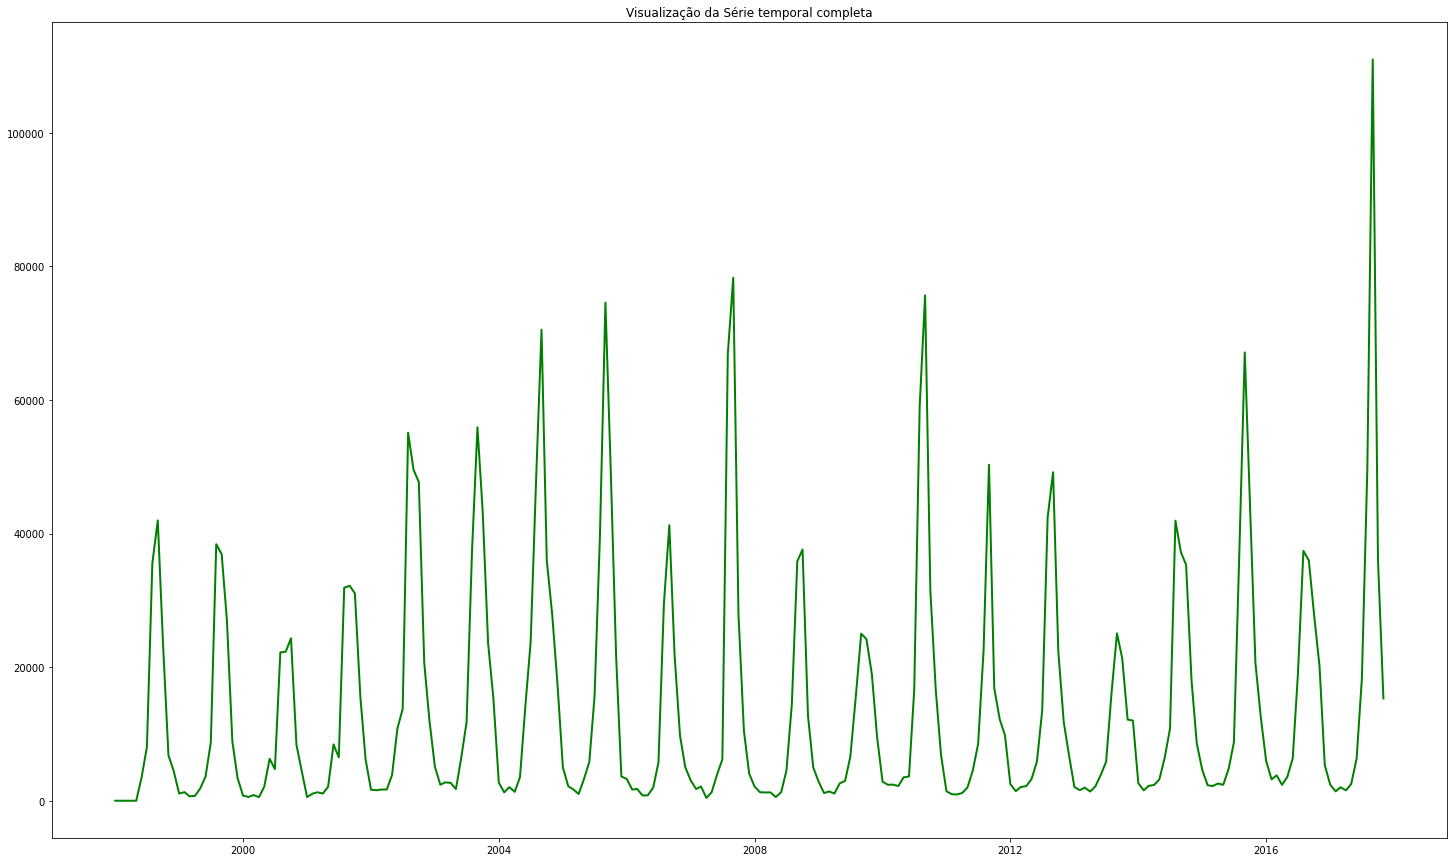

In [ ]:
#Visualização da Série temporal completa
datain = '1998-1'
datafim = '2017-11'

amazon3 = amazon2[datain:datafim]
img, ax = plt.subplots (1,1,sharex=True,sharey=True, figsize=[25,15])
#ax.set_xticks(np.arange(min(amazon3.index), max(amazon3.index)+1, 1.0))
ax.set(title='Visualização da Série temporal completa')
ax.plot (amazon3.index,amazon3['number'],color='green',linewidth=2)


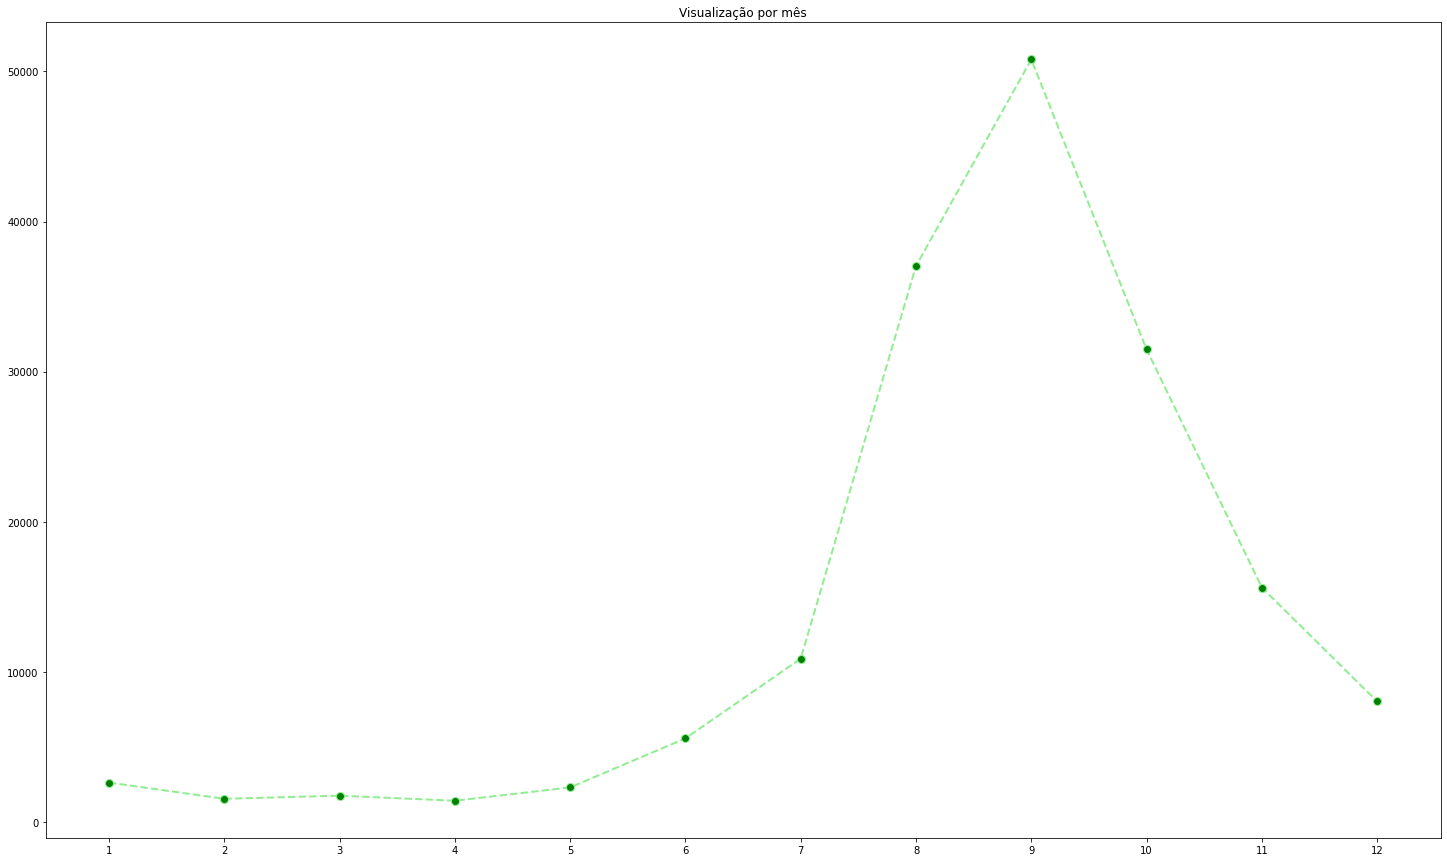

In [ ]:
#Visualização por mês

amazon3 = amazon2.copy()


amazon3 = amazon2.groupby([lambda x: x.month]).mean()
imagem, ax = plt.subplots(1,1, sharex=True, sharey=True, figsize=[25,15])
ax.set_xticks(np.arange(min(amazon3.index), max(amazon3.index)+1, 1.0))
ax.set(title='Visualização por mês')
ax.plot(amazon3,color='lightgreen',marker='o',linestyle='dashed',linewidth=2, markersize=8, markerfacecolor='green')

[Text(0.5, 1.0, 'Aleatoriedade')]

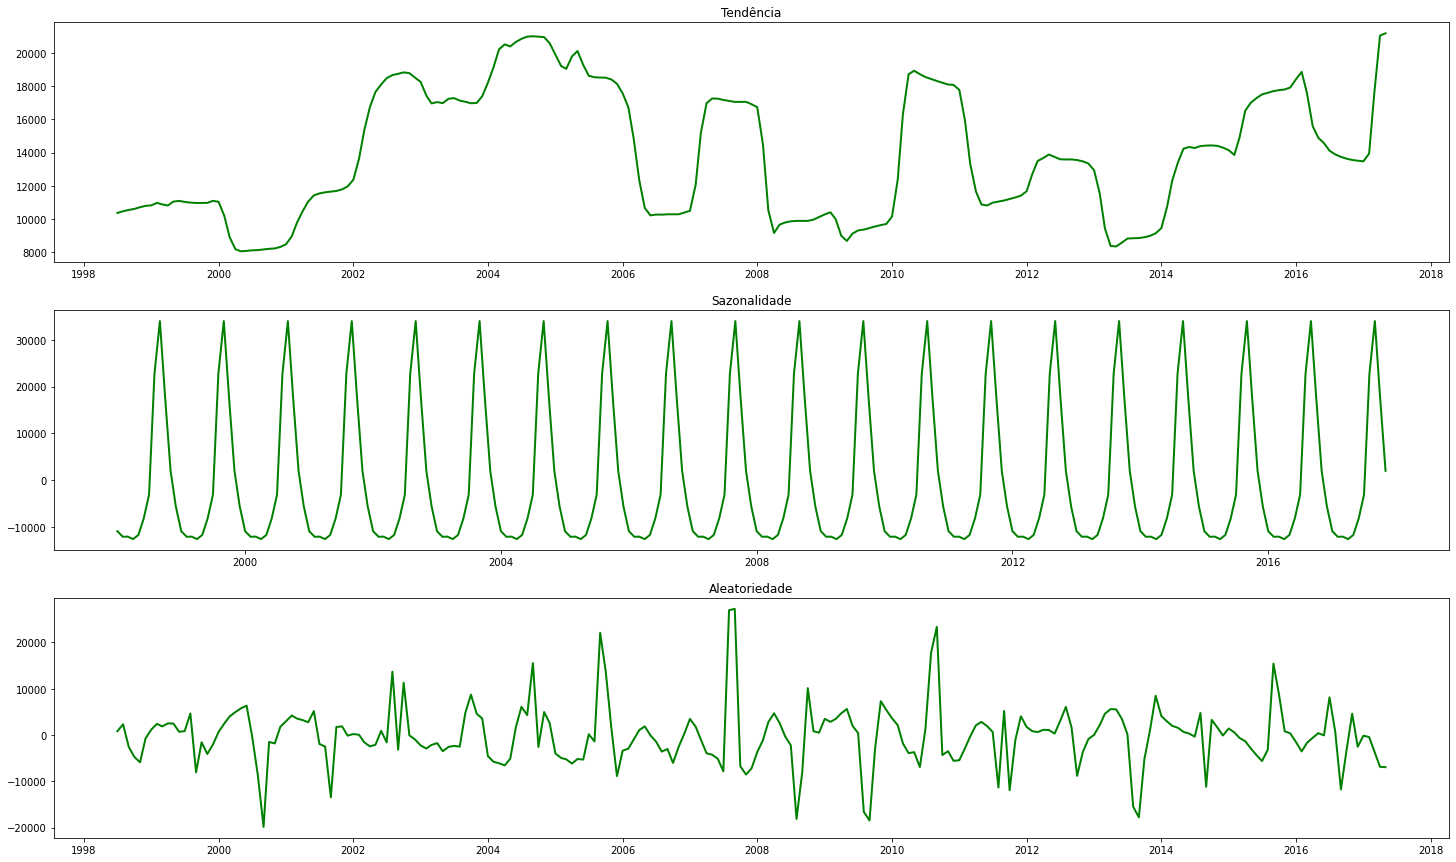

In [ ]:
decomposicao = seasonal_decompose(amazon2)

tendencia = decomposicao.trend
sazonalidade = decomposicao.seasonal
aleatorio = decomposicao.resid

fig, (ax1, ax2, ax3) = plt.subplots(3, 1,squeeze=True)
#plt.subplots_adjust(wspace=0, hspace=0.3)

fig.set_size_inches(25,15)
fig.canvas.draw()

ax1.plot(tendencia,color='green',linewidth=2, markersize=8)
ax1.set(title='Tendência')
ax2.plot(sazonalidade,color='green',linewidth=2, markersize=8)
ax2.set(title='Sazonalidade')
ax3.plot(aleatorio,color='green',linewidth=2, markersize=8)
ax3.set(title='Aleatoriedade')

Ao aplicar séries temporais no dataframe Amazon.csv, podemos concluir que não existe uma
tendência muito clara, a sazonalidade que foi analisada anteriormente realmente existe e
segue um padrão, e também possúi uma aleatoriedade grande nos dados.

</br>



---

</br>

- Utilização do ARIMA para tentativa de previsão para anos futuros

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
modelo = ARIMA(amazon2, order=(2, 1, 2),freq=amazon2.index.inferred_freq)
modelo_treinado = modelo.fit()
modelo_treinado.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 number   No. Observations:                  239
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2570.167
Date:                Sat, 17 Dec 2022   AIC                           5150.334
Time:                        05:29:45   BIC                           5167.695
Sample:                    01-01-1998   HQIC                          5157.331
                         - 11-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5309      0.072     21.264      0.000       1.390       1.672
ar.L2         -0.7998      0.042    -19.234      0.000      -0.881      -0.718
ma.L1         -1.7730      0.107    -16.555      0.000      -1.983      -1.563
ma.L2          0.7938      0.105      7.548      0.000       0.588       1.000
sigma2      1.818e+08   2.99e-10   6.08e+17      0.000    1.82e+08    1.82e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.70   Jarque-Bera (JB):               575.16
Prob(Q):                              0.40   Prob(JB):                         0.00
Heteroskedasticity (H):               2.25   Skew:                             1.38
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.15e+33. Standard errors may be unstable.
"""

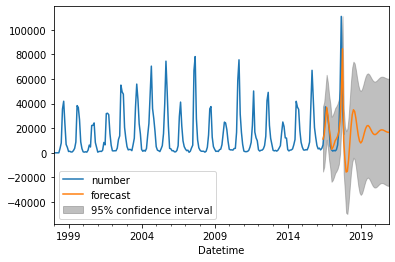

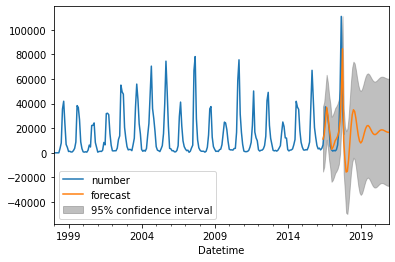

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict
ax = amazon2.plot()
plot_predict(modelo_treinado, '2016-06-01', '2020-12-01', ax = ax, plot_insample = True)

Os resultados não foram muito bons, a margem de erros ficou meio grande para valores futuros devido a aleatoriedade dos dados e por não seguir uma tendência muito clara.

</br>


---


</br>

- Verificação de correlação entre os números de incêndios e áreas desmatadas na região da Amazônia Legal

In [ ]:
defarea2

Acre            5722
Amazonas       12425
Amapa            616
Maranhao        8318
Mato Grosso    43065
Pará           62778
Rondonia       22279
Roraima         3891
Tocantins       1241
dtype: int64

In [ ]:
incendios_desmatamentos = incendios_estados_amazonia.copy()
incendios_desmatamentos.columns = ["Incêndios"]

dfaindex = ['Acre', 'Amapa', 'Amazonas', 'Maranhao', 'Mato Grosso' ,'Pará', 'Rondonia','Roraima','Tocantins']
defarea3 = defarea2.copy()
defarea3 = defarea3.reindex(dfaindex)

incendios_desmatamentos['Desmatamentos'] = defarea3

inc_t = incendios_desmatamentos['Incêndios'].sum()
desm_t = incendios_desmatamentos['Desmatamentos'].sum()

incendios_desmatamentos['Incêndios_P'] = incendios_desmatamentos['Incêndios'] * 100 / inc_t
incendios_desmatamentos['Desmatamentos_P'] = incendios_desmatamentos['Desmatamentos'] * 100 / desm_t

incendios_desmatamentos

,Incêndios,Desmatamentos,Incêndios_P,Desmatamentos_P
state,,,,
Acre,68345,5722,2.896943,3.568778
Amapa,25116,616,1.064593,0.384196
Amazonas,117467,12425,4.979080,7.749400
Maranhao,375279,8318,15.906971,5.187888
Mato Grosso,767890,43065,32.548594,26.859388
Pará,577841,62778,24.492977,39.154271
Rondonia,185387,22279,7.858008,13.895282
Roraima,29454,3891,1.248468,2.426794
Tocantins,212432,1241,9.004366,0.774004


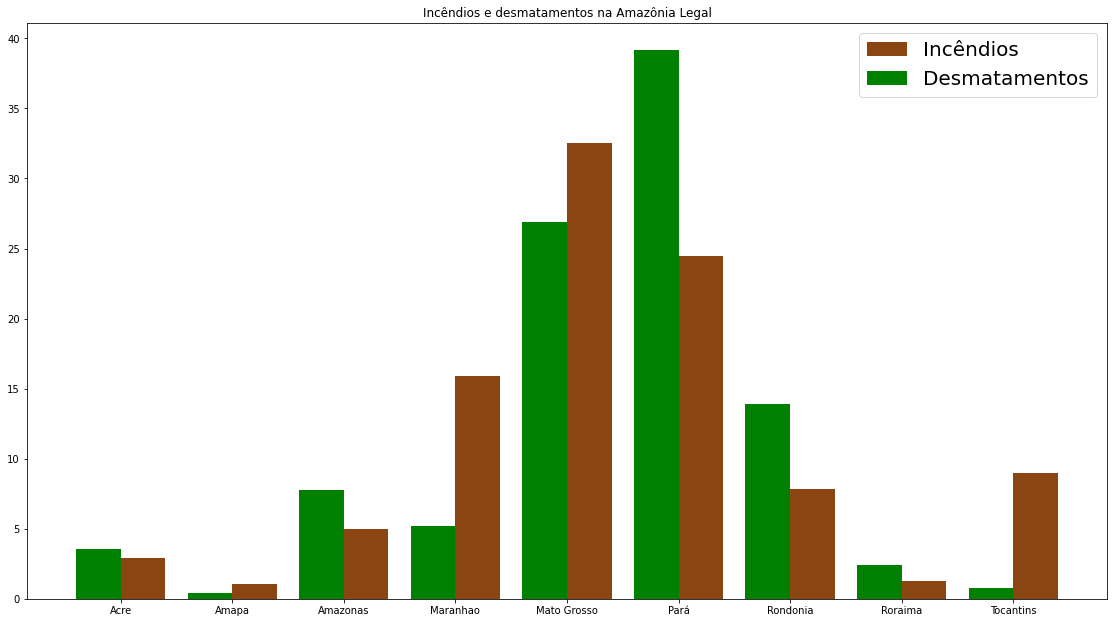

In [ ]:
fig = plt.figure(figsize=[15,8])
ax = fig.add_axes([0,0,1,1])
ax.set(title='Incêndios e desmatamentos na Amazônia Legal')

ax.bar(incendios_desmatamentos.index,incendios_desmatamentos['Incêndios_P'], color='saddlebrown', width=0.4,align='edge', label="Incêndios")
ax.bar(incendios_desmatamentos.index,incendios_desmatamentos['Desmatamentos_P'], color='green', width=-0.4,align='edge', label="Desmatamentos")

ax.legend(prop={'size': 20})

Teste de Pearson(Correlação):  0.818443591087375




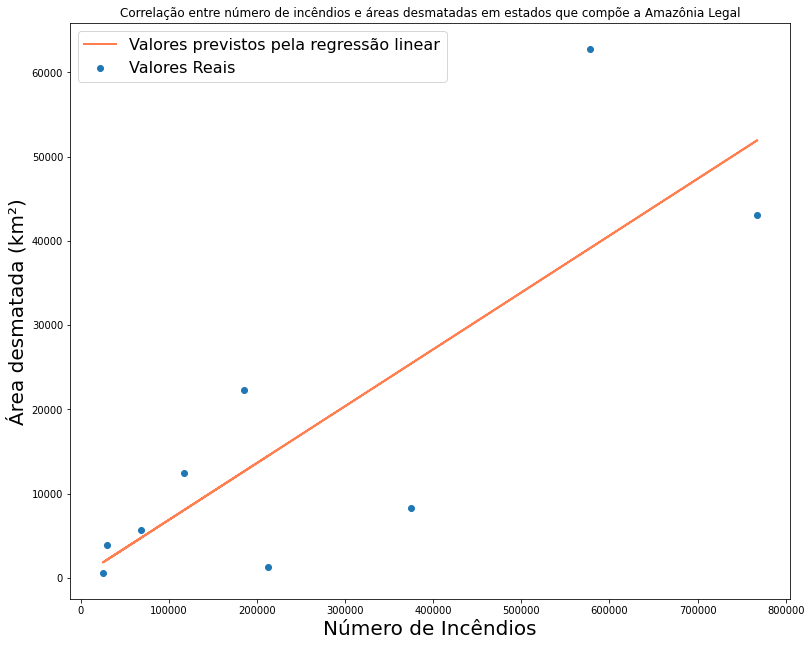

In [ ]:
incendios_desmatamentos2 = incendios_desmatamentos.copy()
#incendios_desmatamentos2 = incendios_desmatamentos2.sort_values('Incêndios')





correlacao = pearsonr(incendios_desmatamentos2['Incêndios'],incendios_desmatamentos2['Desmatamentos'])
print('Teste de Pearson(Correlação): ', correlacao[0])
print('\n')

X = incendios_desmatamentos2['Incêndios'].values
X = X.reshape(-1,1)
y = incendios_desmatamentos2['Desmatamentos']

preditor_lr.fit(X,y)
y_predicted = preditor_lr.predict(X)

fig = plt.figure(figsize=[10,8])
ax = fig.add_axes([0,0,1,1])
ax.set(title='Correlação entre número de incêndios e áreas desmatadas em estados que compõe a Amazônia Legal')
plt.scatter(incendios_desmatamentos2['Incêndios'],incendios_desmatamentos2['Desmatamentos'], label='Valores Reais')
ax.plot(X,y_predicted,color='coral',linewidth=2, markerfacecolor='red',label='Valores previstos pela regressão linear')
ax.set_xlabel('Número de Incêndios', fontsize=20)
ax.set_ylabel('Área desmatada (km²)', fontsize=20)

ax.legend(prop={'size': 16})





</br>


---


</br>

# Considerações Finais:
- Sazonalidade notável na segunda metade do ano, podemos observar um pico no número de incêndios a partir de junho na grande maioria dos Estados.
- Existe uma possível correlação entre os números de incêndios e áreas desmatadas em cada estado, ou seja, se o estado possui muitos incêndios, existe a probabilidade da área desmatada também ser grande.
- Não parece haver correlação entre os números anuais de incêndios florestais e áreas desmatadas. Os números de incêndios parecem estar crescendo enquanto as áreas desmatadas parecem estar diminuindo.